Written by Ivan

Here I am trying to create subsets and perform SHAP analysis on them.
for example: sort out males and females and see within each subset what the deciding factors are

Gender Studies:
    
    1 means male
    0 means female

In [85]:
import pandas as pd
import os

# 读取完整数据
df = pd.read_csv('/Users/haoz/Desktop/cs506-project/datasets/processed_data/encoded_cleaned_recruitment_data.csv')

# 创建按性别拆分的子集保存目录
output_dir = '/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender'
os.makedirs(output_dir, exist_ok=True)

# 按 Gender 拆分并保存
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    filename = f"{output_dir}/recruitment_data_gender_{gender}.csv"
    subset.to_csv(filename, index=False)
    print(f"Saved subset for Gender={gender}: {filename}")


Saved subset for Gender=Male: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Male.csv
Saved subset for Gender=Female: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Female.csv


For females:

In [86]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Female.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    "RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 193, number of negative: 416
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 609, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316913 -> initscore=-0.767995
[LightGBM] [Info] Start training from score -0.767995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: title={'center': 'LightGBM Feature Importance (Gain) - female'}, xlabel='Feature importance', ylabel='Features'>

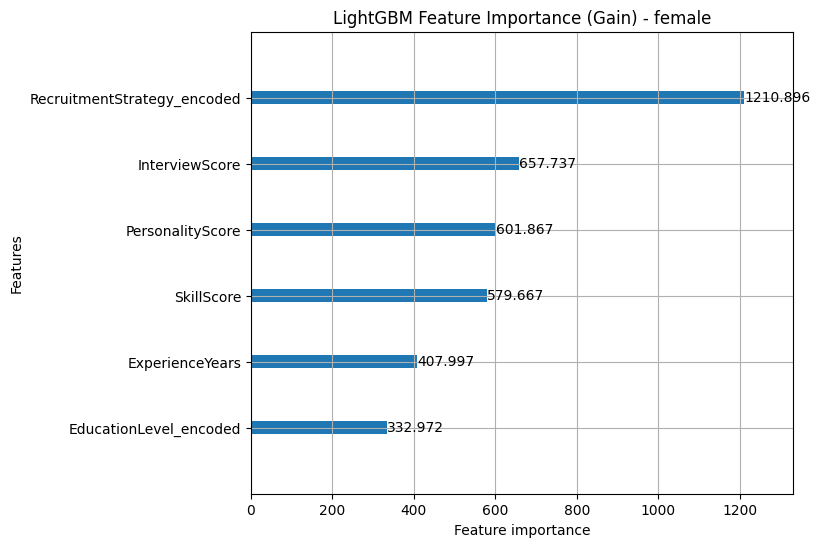

In [87]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) - female")

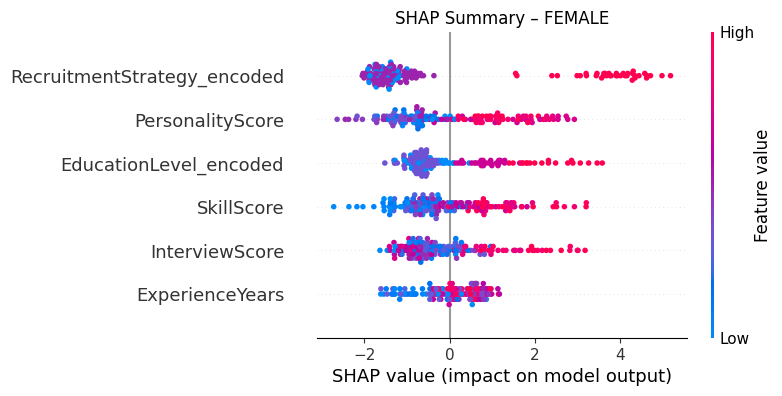

In [88]:
import shap
import matplotlib.pyplot as plt

# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – FEMALE")
plt.show()

# save the info
# Female 子集训练与 SHAP
classifier_female = classifier      # 保留 Female 模型
X_test_female = X_test.copy()       # 保留 Female 测试集
shap_values_female = shap.Explainer(classifier_female, X_test_female)(X_test_female)



Since Recuitment Strategy seems to contribute the most to the result among females, what are the factors of the females using each recruitment strategy and how do they contribute to the result

In [90]:
df_female = pd.read_csv('/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Female.csv')


output_dir = '/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies'
os.makedirs(output_dir, exist_ok=True)


for strategy in df_female['RecruitmentStrategy_encoded'].unique():
    subset = df_female[df_female['RecruitmentStrategy_encoded'] == strategy]
    filename = f"{output_dir}/recruitment_data_Female_{strategy}.csv"
    subset.to_csv(filename, index=False)
    print(f"Saved subset for Female={strategy}: {filename}")


Saved subset for Female=1: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_1.csv
Saved subset for Female=2: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_2.csv
Saved subset for Female=0: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_0.csv


For referrals（2）:

In [91]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_2.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 127, number of negative: 51
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 178, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.713483 -> initscore=0.912361
[LightGBM] [Info] Start training from score 0.912361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

<Axes: title={'center': 'LightGBM Feature Importance (Gain) - Female -referral'}, xlabel='Feature importance', ylabel='Features'>

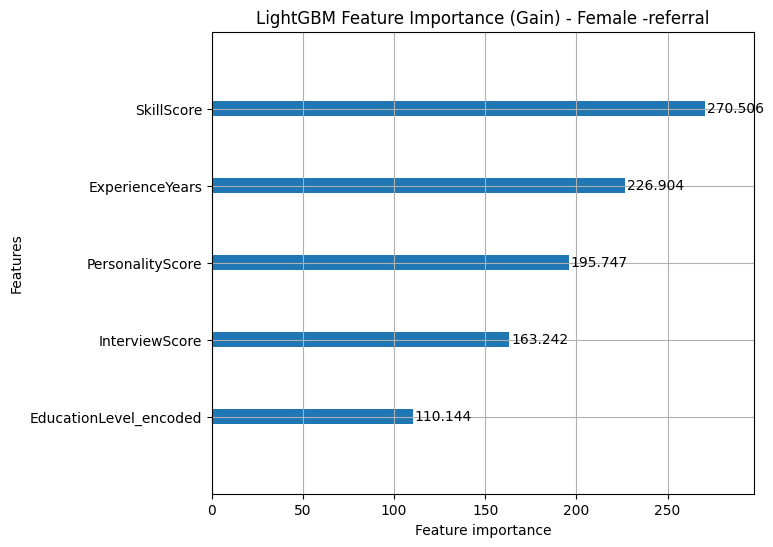

In [92]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) - Female -referral")

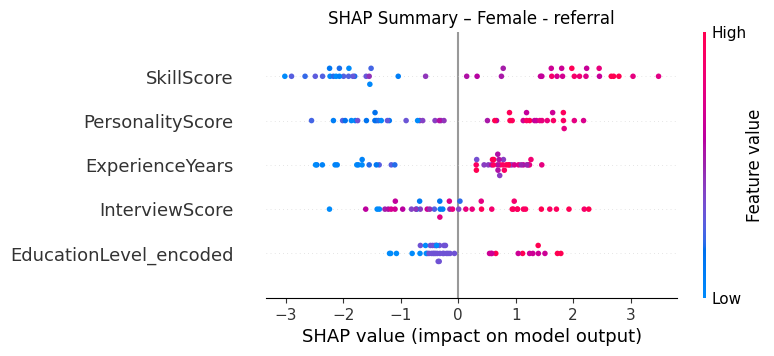

In [93]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – Female - referral")
plt.show()

# save the info
# Female 子集训练与 SHAP
classifier_female = classifier      # 保留 Female 模型
X_test_female = X_test.copy()       # 保留 Female 测试集
shap_values_female = shap.Explainer(classifier_female, X_test_female)(X_test_female)

For onlines (1):

In [94]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_1.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 40, number of negative: 268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 308, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.129870 -> initscore=-1.902108
[LightGBM] [Info] Start training from score -1.902108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'LightGBM Feature Importance (Gain) - Female - online'}, xlabel='Feature importance', ylabel='Features'>

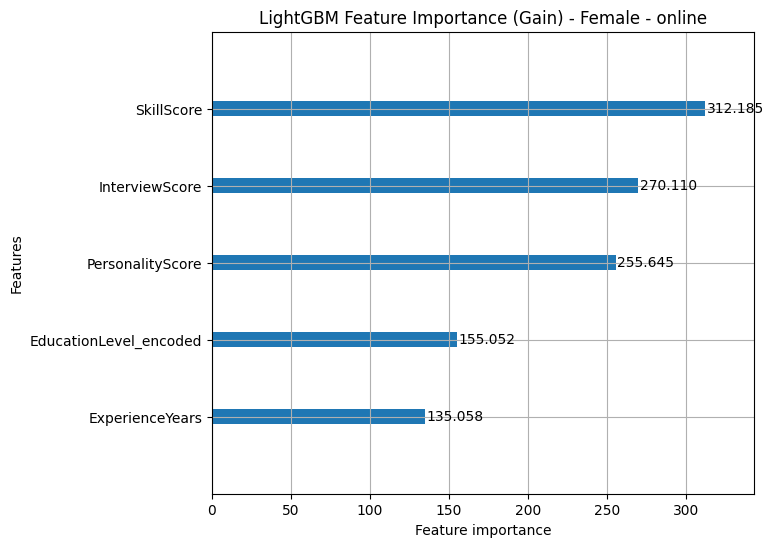

In [95]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) - Female - online")

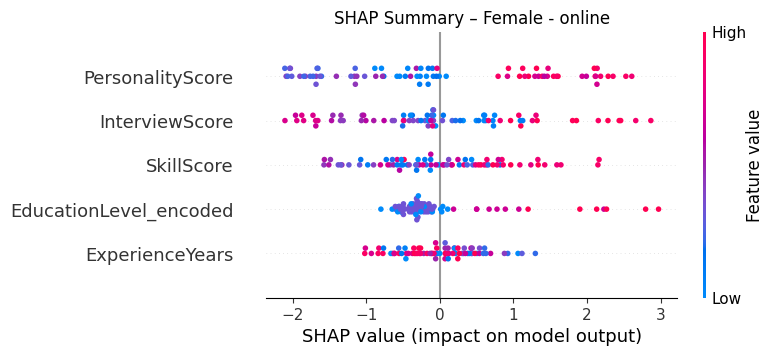

In [96]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – Female - online")
plt.show()

# save the info
# Female 子集训练与 SHAP
classifier_female = classifier      # 保留 Female 模型
X_test_female = X_test.copy()       # 保留 Female 测试集
shap_values_female = shap.Explainer(classifier_female, X_test_female)(X_test_female)

For agencies (0):

In [97]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Female_Strategies/recruitment_data_Female_0.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 19, number of negative: 104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 123, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154472 -> initscore=-1.699952
[LightGBM] [Info] Start training from score -1.699952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'LightGBM Feature Importance (Gain) - Female - agency'}, xlabel='Feature importance', ylabel='Features'>

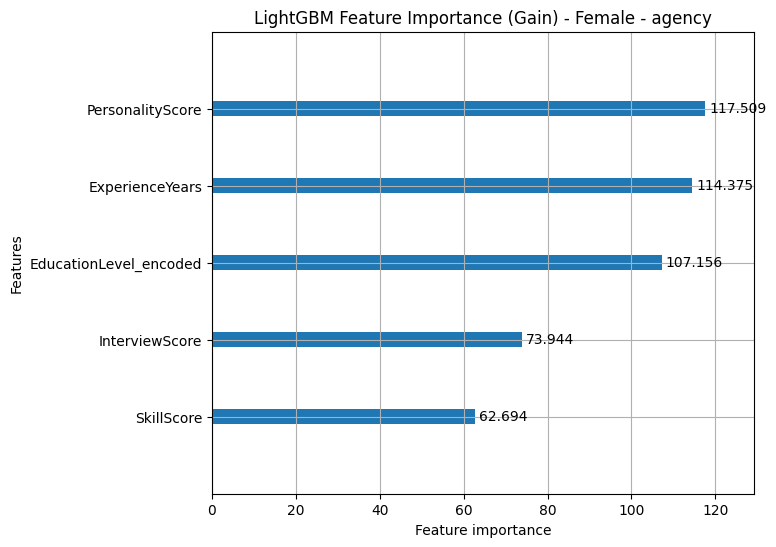

In [98]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) - Female - agency")

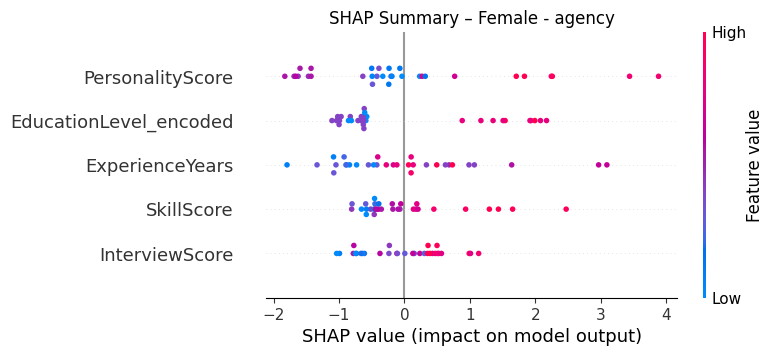

In [99]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – Female - agency")
plt.show()

# save the info
# Female 子集训练与 SHAP
classifier_female = classifier      # 保留 Female 模型
X_test_female = X_test.copy()       # 保留 Female 测试集
shap_values_female = shap.Explainer(classifier_female, X_test_female)(X_test_female)

For males:

In [100]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Male.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    "RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))



[LightGBM] [Info] Number of positive: 177, number of negative: 413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.300000 -> initscore=-0.847298
[LightGBM] [Info] Start training from score -0.847298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -Males'}, xlabel='Feature importance', ylabel='Features'>

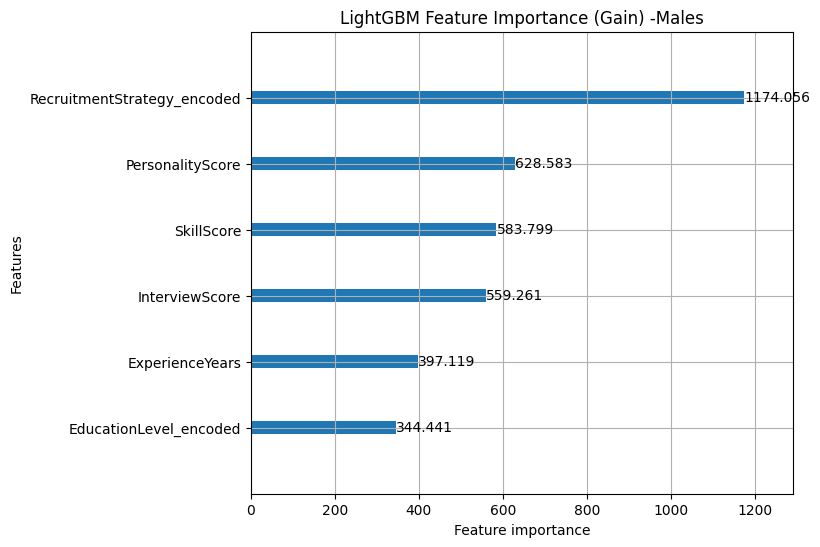

In [101]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -Males")

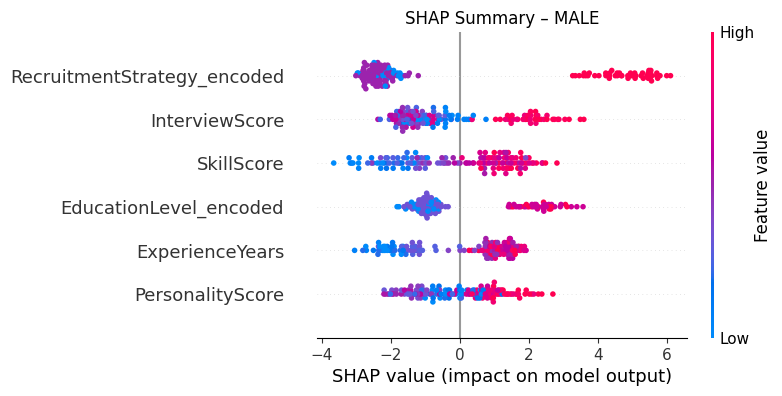

In [102]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – MALE")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

For males, also separately consider the three recruitment strategies

In [103]:
df_male = pd.read_csv('/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/recruitment_data_gender_Male.csv')


output_dir = '/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies'
os.makedirs(output_dir, exist_ok=True)


for strategy in df_male['RecruitmentStrategy_encoded'].unique():
    subset = df_male[df_male['RecruitmentStrategy_encoded'] == strategy]
    filename = f"{output_dir}/recruitment_data_Male_{strategy}.csv"
    subset.to_csv(filename, index=False)
    print(f"Saved subset for Male={strategy}: {filename}")

Saved subset for Male=2: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_2.csv
Saved subset for Male=1: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_1.csv
Saved subset for Male=0: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_0.csv


For male referrals (2):

In [104]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_2.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 124, number of negative: 53
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 177, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700565 -> initscore=0.849990
[LightGBM] [Info] Start training from score 0.849990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -Males - referrals'}, xlabel='Feature importance', ylabel='Features'>

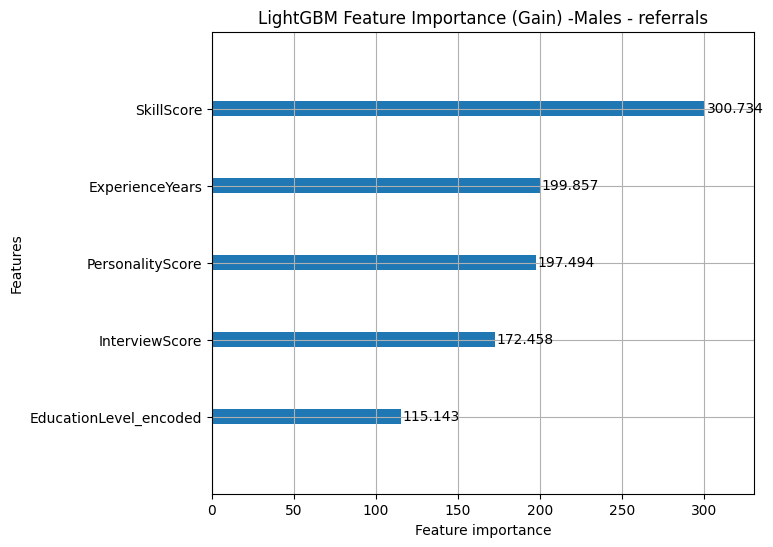

In [105]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -Males - referrals")

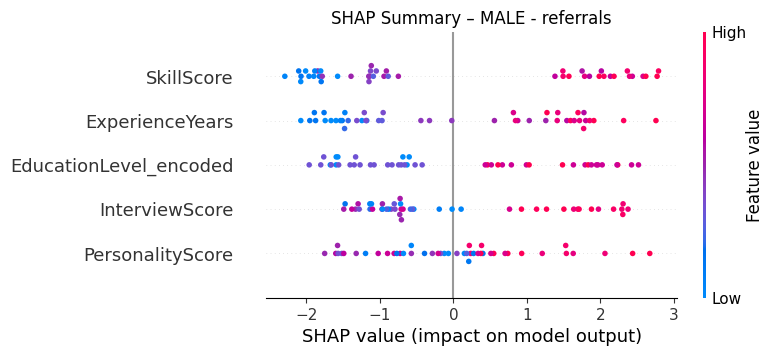

In [106]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – MALE - referrals")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

For male online (1):

In [107]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_1.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 41, number of negative: 267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 308, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133117 -> initscore=-1.873677
[LightGBM] [Info] Start training from score -1.873677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -Males - online'}, xlabel='Feature importance', ylabel='Features'>

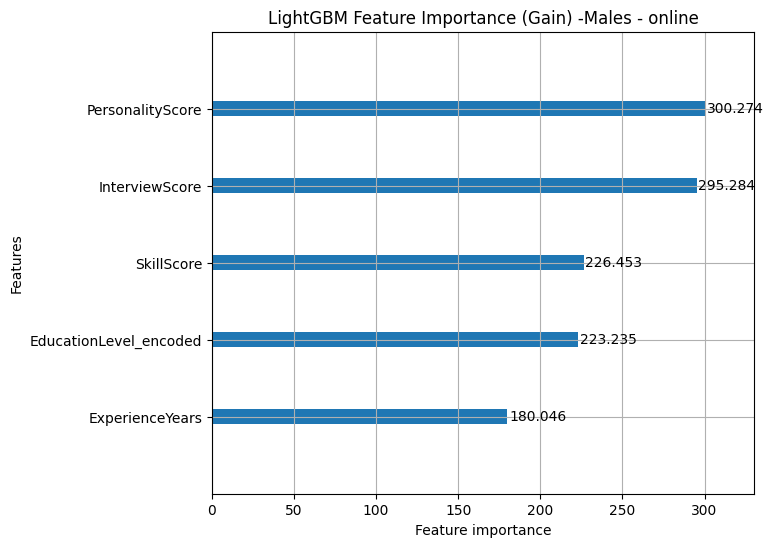

In [108]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -Males - online")

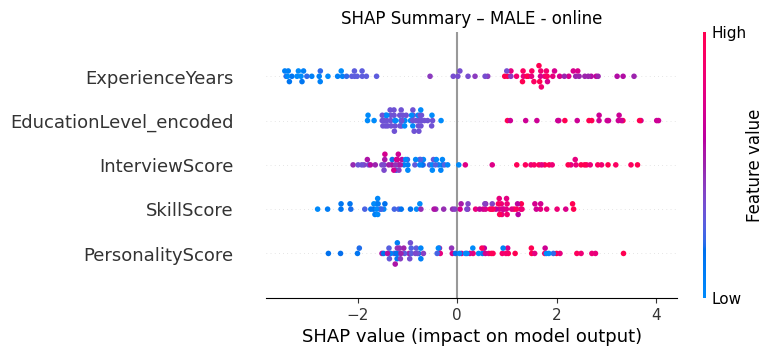

In [109]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – MALE - online")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

For male agency (0):

In [110]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_gender/subsets_by_gender_Male_Strategies/recruitment_data_Male_0.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    # "Gender",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 12, number of negative: 92
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 104, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115385 -> initscore=-2.036882
[LightGBM] [Info] Start training from score -2.036882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -Males - online'}, xlabel='Feature importance', ylabel='Features'>

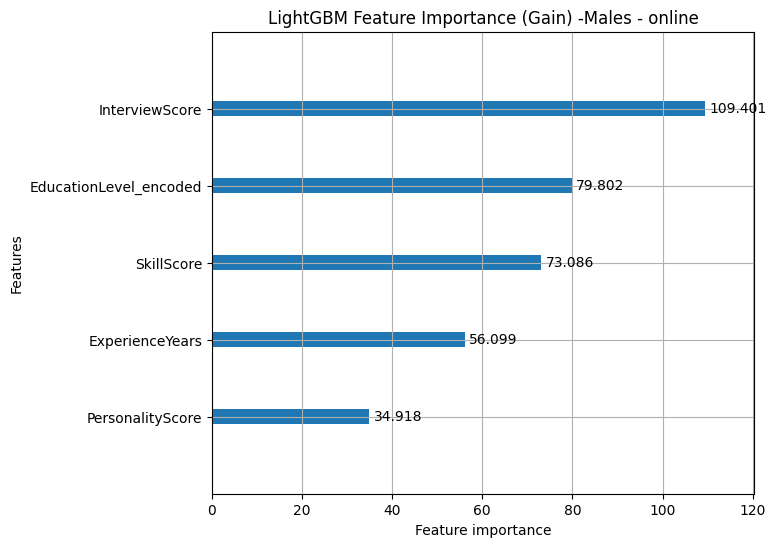

In [111]:
lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -Males - online")

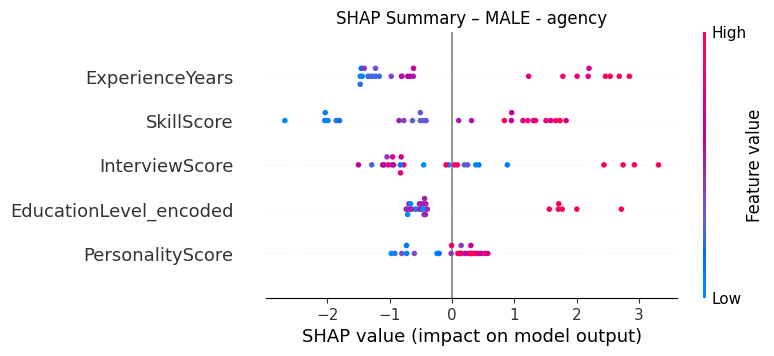

In [112]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – MALE - agency")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

Compare males and females in general:

,Female,Male
ExperienceYears,0.840087,1.477471
InterviewScore,0.518984,1.016287
SkillScore,0.577472,1.223528
PersonalityScore,1.093677,0.385666
EducationLevel_encoded,1.067124,0.850315


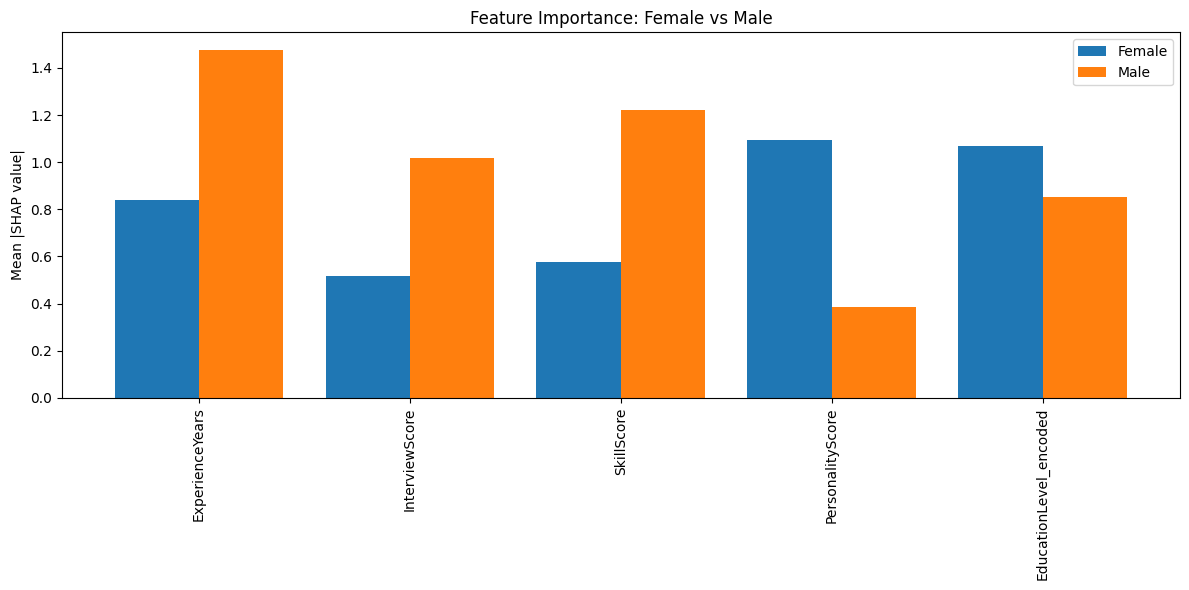

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# —— 1. 计算 mean |SHAP value| ——  
# 假设你已经有：
#   shap_values_female 和 shap_values_male（都是 shap.Explainer(...)(...) 的输出）
#   X_test_female.columns == X_test_male.columns == 特征列表

features = X_test_female.columns.tolist()
mean_female = np.abs(shap_values_female.values).mean(axis=0)
mean_male   = np.abs(shap_values_male.values).mean(axis=0)

# —— 2. 合并到一个 DataFrame ——  
df_shap = pd.DataFrame({
    'Female': mean_female,
    'Male':   mean_male
}, index=features)

# 看一下表格
display(df_shap)

# —— 3. 绘制对比柱状图 ——  
ax = df_shap.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8
)
ax.set_ylabel('Mean |SHAP value|')
ax.set_title('Feature Importance: Female vs Male')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Then we analyze the whole demographic in terms of recruitment strategy:

In [114]:
# 读取完整数据
df = pd.read_csv('/Users/haoz/Desktop/cs506-project/datasets/processed_data/encoded_cleaned_recruitment_data.csv')

# 创建按性别拆分的子集保存目录
output_dir = '/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy'
os.makedirs(output_dir, exist_ok=True)

# 按 Gender 拆分并保存
for strategy in df['RecruitmentStrategy_encoded'].unique():
    subset = df[df['RecruitmentStrategy_encoded'] == strategy]
    filename = f"{output_dir}/recruitment_strategy_{strategy}.csv"
    subset.to_csv(filename, index=False)
    print(f"Saved subset for Recruitment Strategy={strategy}: {filename}")


Saved subset for Recruitment Strategy=2: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_2.csv
Saved subset for Recruitment Strategy=1: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_1.csv
Saved subset for Recruitment Strategy=0: /Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_0.csv


For referral (2):

[LightGBM] [Info] Number of positive: 256, number of negative: 100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 356, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.719101 -> initscore=0.940007
[LightGBM] [Info] Start training from score 0.940007
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -referral'}, xlabel='Feature importance', ylabel='Features'>

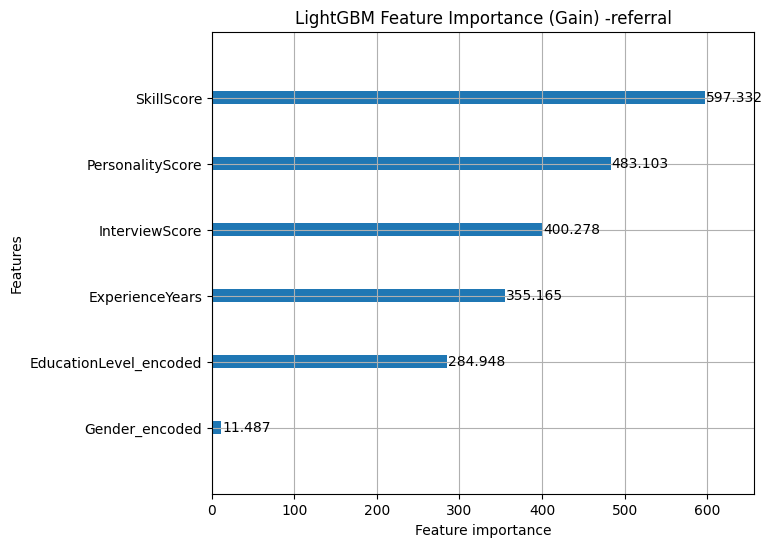

In [120]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_2.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    "Gender_encoded",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -referral")

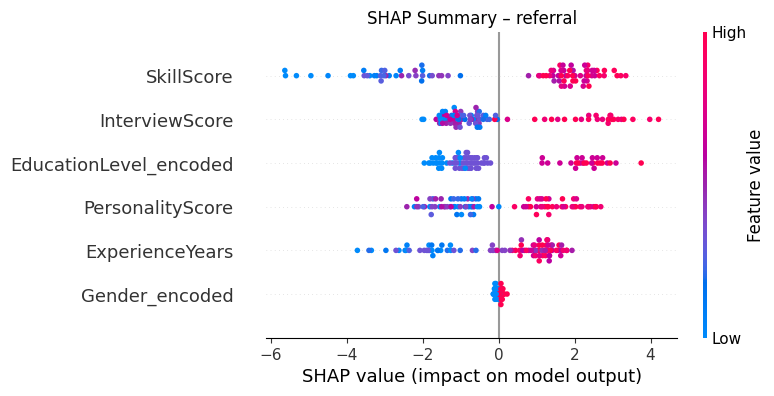

In [121]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – referral")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

For online (1):

[LightGBM] [Info] Number of positive: 86, number of negative: 530
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 616, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139610 -> initscore=-1.818530
[LightGBM] [Info] Start training from score -1.818530
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -online'}, xlabel='Feature importance', ylabel='Features'>

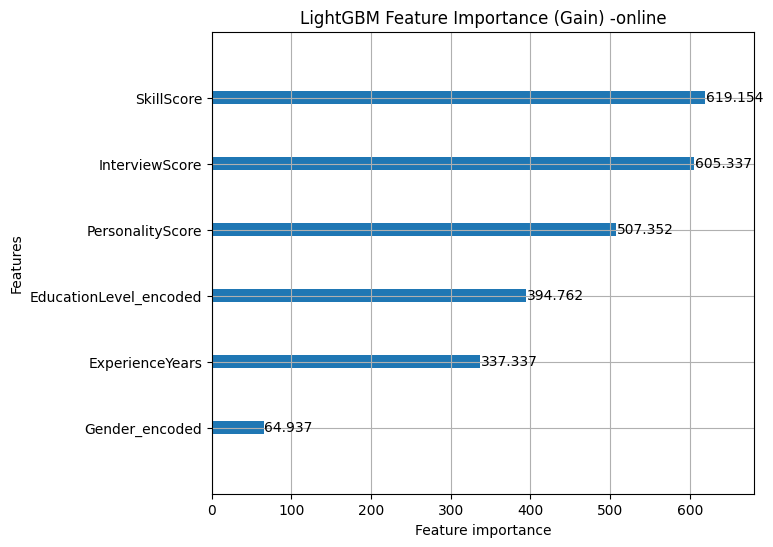

In [123]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_1.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    "Gender_encoded",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -online")

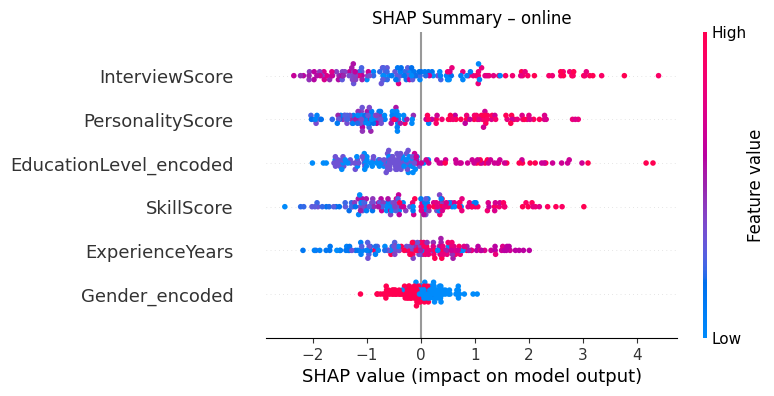

In [124]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – online")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)

For angency (0):

[LightGBM] [Info] Number of positive: 32, number of negative: 196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.140351 -> initscore=-1.812379
[LightGBM] [Info] Start training from score -1.812379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Axes: title={'center': 'LightGBM Feature Importance (Gain) -agency'}, xlabel='Feature importance', ylabel='Features'>

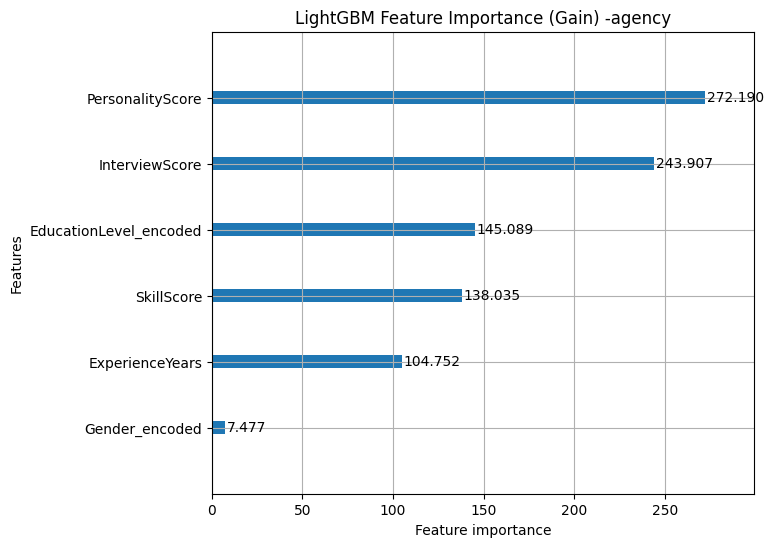

In [126]:
# 1. 读取已编码的完整数据
file_path = ("/Users/haoz/Desktop/cs506-project/datasets/processed_data/subsets_by_recruitment_strategy/recruitment_strategy_0.csv")
outcomes = pd.read_csv(file_path)
outcomes.reset_index(drop=True, inplace=True)

# 2. 定义特征矩阵 X 和目标向量 y
FEATURES = [
    "ExperienceYears",
    "InterviewScore",
    "SkillScore",
    "PersonalityScore",
    "Gender_encoded",
    #"RecruitmentStrategy_encoded",
    "EducationLevel_encoded"
]
X = outcomes[FEATURES]
y = outcomes["HiringDecision"]

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练 LightGBM 分类器
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

# 5. 在测试集上做预测并输出分类报告
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

lgb.plot_importance(classifier, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain) -agency")

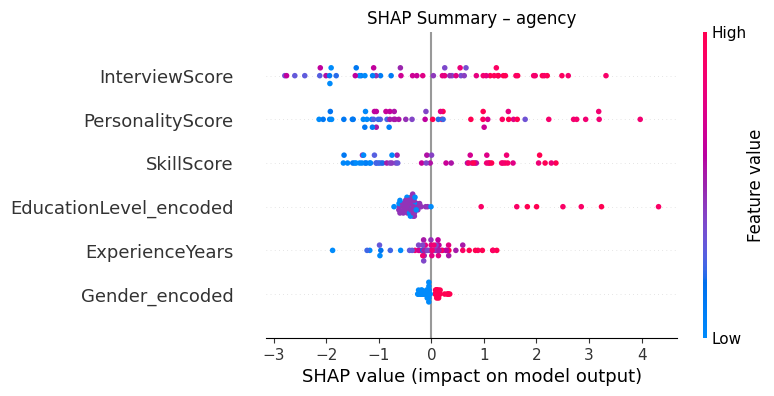

In [127]:
# 1. 构造 SHAP Explainer
explainer = shap.Explainer(classifier, X_test)

# 2. 计算 SHAP values
shap_values = explainer(X_test)

# 3. 绘制 summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary – agency")
plt.show()

#save info
# Male 子集训练与 SHAP
classifier_male = classifier        # 保留 Male 模型
X_test_male = X_test.copy()         # 保留 Male 测试集
shap_values_male = shap.Explainer(classifier_male, X_test_male)(X_test_male)